In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pathlib 
import os 
import warnings
warnings.filterwarnings("ignore")

inputdir = "/Volumes/HNSD01/raw_data/cancerscem2/counts"
outputdir = "/Volumes/HNSD01/outdir/cancerscem2"

path_to_main_output = os.path.join(outputdir, "main_output")
path_to_01_output = os.path.join(path_to_main_output, "01_output")
os.system(f"mkdir -p {path_to_01_output}")

metadata = pd.read_excel(os.path.join(inputdir, "CancerSCEM.metadata.xlsx"))
metadata["raw_input_path"] = metadata["Sample ID"].apply(
    lambda x: os.path.join(inputdir, f"{x}.counts.matrix.tsv") if os.path.isfile(os.path.join(inputdir, f"{x}.counts.matrix.tsv")) == True else "not found"
)

##### check if there is any Lung project
all_lung_projects = [item for item in metadata["Project ID"].unique() if "LUAD" in item or "LUSC" in item or "NSCLC" in item]
print(f"list of potential lung cancer projects: {', '.join(all_lung_projects)}")

fetch_all_finished_data = [
    item for item in pathlib.Path("/Volumes").glob("HNWD02/outdir/cancerscem2/CancerSCEM2_default/1st_round/*/s8a_output/*.rds")
]
datadf = pd.DataFrame(data = [str(item) for item in fetch_all_finished_data], columns = ["path"])
datadf["SampleID"] = datadf["path"].apply(lambda x: x.split("/")[-3].replace(".counts.matrix.tsv_1st_round", ""))

metadata = metadata.merge(datadf, left_on = "Sample ID", right_on = "SampleID", how = "outer")

metadata["status"] = metadata["path"].apply(lambda x: "finished" if pd.isna(x) == False else "not yet")

metadata["ORGAN"] = metadata["Project ID"].apply(lambda x: x.split("-")[0])

list of potential lung cancer projects: LUAD-003, LUAD-004, LUSC-005, NSCLC-006, NSCLC-007, LUSC-092, LUAD-096, LUAD-134


In [2]:
print(f"number of fetched samples: {len(fetch_all_finished_data)}")

number of fetched samples: 1090


In [3]:
# # Use Tableau 20 color palette
# colors = plt.cm.tab20(range(len(pie_labels)))

# # Pie chart for organ distribution
# plt.figure(figsize=(12, 8))
# organ_counts = metadata['ORGAN'].value_counts()

# # Get top 10 and group others
# top_10 = organ_counts.head(10)
# others_count = organ_counts.iloc[10:].sum()

# # Create data for pie chart
# if others_count > 0:
#     pie_data = list(top_10.values) + [others_count]
#     pie_labels = list(top_10.index) + ['Others']
# else:
#     pie_data = top_10.values
#     pie_labels = top_10.index

# plt.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90, colors=colors)
# plt.title('Dataset Distribution by Organ (Top 10)')
# plt.axis('equal')
# plt.show()

# # Display the counts as well
# print("Number of datasets per organ (Top 10):")
# for organ, count in top_10.items():
#     print(f"{organ}: {count}")
# if others_count > 0:
#     print(f"Others: {others_count}")

# # Show just lung cancer projects details
# lung_metadata = metadata[metadata['ORGAN'].isin(['LUAD', 'LUSC', 'NSCLC'])]
# print("\nLung cancer projects details:")
# print(lung_metadata[['Project ID', 'Sample ID', 'Sample Type', 'status', 'ORGAN']].head(10))
# print(f"\nTotal lung cancer samples: {len(lung_metadata)}")
# print(f"Finished lung cancer samples: {len(lung_metadata[lung_metadata['status'] == 'finished'])}")

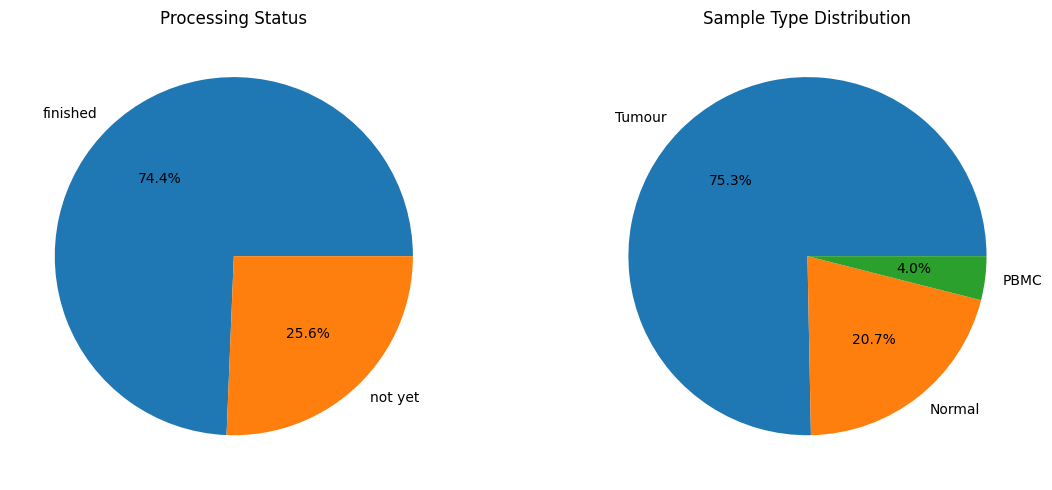

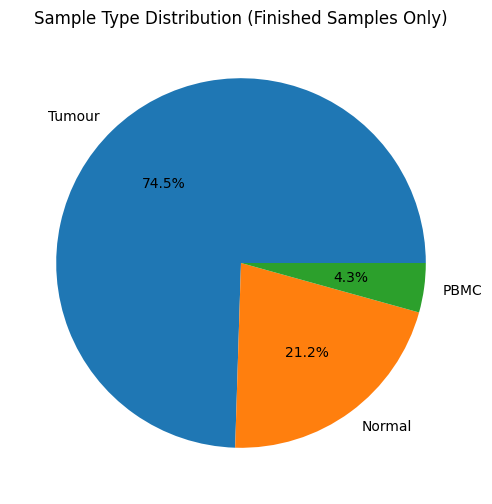

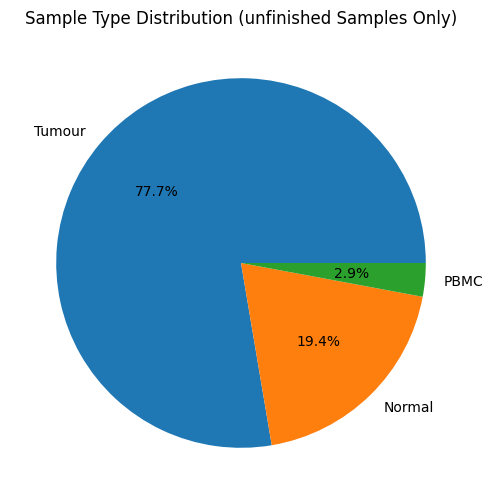

In [4]:

# Pie chart for status
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
status_counts = metadata['status'].value_counts()
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Processing Status')

# Pie chart for sample type
plt.subplot(1, 2, 2)
sample_type_counts = metadata['Sample Type'].value_counts()
plt.pie(sample_type_counts.values, labels=sample_type_counts.index, autopct='%1.1f%%')
plt.title('Sample Type Distribution')

plt.tight_layout()
plt.show()

# Sample type distribution for finished samples only
finished_metadata = metadata[metadata['status'] == 'finished']
finished_sample_type_counts = finished_metadata['Sample Type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(finished_sample_type_counts.values, labels=finished_sample_type_counts.index, autopct='%1.1f%%')
plt.title('Sample Type Distribution (Finished Samples Only)')
plt.show()

# Sample type distribution for finished samples only
finished_metadata = metadata[metadata['status'] != 'finished']
finished_sample_type_counts = finished_metadata['Sample Type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(finished_sample_type_counts.values, labels=finished_sample_type_counts.index, autopct='%1.1f%%')
plt.title('Sample Type Distribution (unfinished Samples Only)')
plt.show()

In [5]:
metadata.groupby("status").count()

,Project ID,Sample ID,Sample Type,Data source,BioProject,GEO,SRA,SRS,SRX,SRR,...,Strategy,Library Layout,Cell count,Publication,PMID,DOI,raw_input_path,path,SampleID,ORGAN
status,,,,,,,,,,,,,,,,,,,,,
finished,1090,1090,1090,1090,1090,719,999,995,999,999,...,1090,1090,1090,811,811,811,1090,1090,1090,1090
not yet,376,376,376,376,370,355,361,360,361,361,...,376,370,376,331,328,331,376,0,0,376


In [6]:
metadata["outdir_disk"] = metadata["path"].apply(lambda x: x.split("/")[2] if pd.isna(x) == False else "not found")
metadata.groupby("outdir_disk").count()

,Project ID,Sample ID,Sample Type,Data source,BioProject,GEO,SRA,SRS,SRX,SRR,...,Library Layout,Cell count,Publication,PMID,DOI,raw_input_path,path,SampleID,status,ORGAN
outdir_disk,,,,,,,,,,,,,,,,,,,,,
HNWD02,1090,1090,1090,1090,1090,719,999,995,999,999,...,1090,1090,811,811,811,1090,1090,1090,1090,1090
not found,376,376,376,376,370,355,361,360,361,361,...,370,376,331,328,331,376,0,0,376,376


In [7]:
# for sampleid in metadata.SampleID.unique():
#     os.system(f"wget https://ngdc.cncb.ac.cn/cancerscem/downloads/cell_annotation/{sampleid}.cell.type.txt -P /Volumes/HNSD01/raw_data/CancerSCEM2/celltype_annotation")

In [8]:
candidate_organs = ["LUSC", "LUAD", "NSCLC", "STAD", "CRC", "HCC", "BRCA"]

organ_metadata = dict()
for group in candidate_organs:
    organ_metadata[group] = metadata[(metadata["ORGAN"] == group) & (metadata["status"] == "finished")]



In [ ]:
# dest = "/media/hieunguyen/HNSD01/raw_data/CancerSCEM2"
# for group in organ_metadata.keys():
#     for path in organ_metadata[group].path.unique():
#         path = "/".join(path.split("/")[:-2])
#         os.system(f"sshpass -p genov4 rsync -avh --progress {path} rtx:{dest}/{group}")

# ***** bosung *****
# for input_cohort in ["LUSC", "LUAD", "NSCLC", "STAD", "CRC", "HCC", "BRCA"]:
#     bosung_files = metadata[(metadata["ORGAN"] == input_cohort) & (metadata["status"] == "finished") &
#             (metadata["rtx_path"].isna() == True) ].path.unique()
#     if len(bosung_files) > 0:
#         for path in bosung_files:
#             os.system(f"sshpass -p genov4 rsync -avh --progress {path} rtx:/media/hieunguyen/HNSD01/raw_data/CancerSCEM2/{input_cohort}")


In [10]:
rtx_metadata = pd.read_csv("metadata_in_rtx.csv", header = None)
rtx_metadata.columns = ["rtx_path"]

rtx_metadata["SampleID"] = rtx_metadata["rtx_path"].apply(
    lambda x: x.split("/")[-1].replace(".counts.matrix.tsv_1st_round", "")
)
metadata = metadata.merge(rtx_metadata, left_on="Sample ID", right_on="SampleID", how="outer")

In [11]:
metadata.to_csv("processed_metadata.csv")


In [ ]:
for input_cohort in ["LUSC", "LUAD", "NSCLC", "STAD", "CRC", "HCC", "BRCA"]:
    bosung_files = metadata[(metadata["ORGAN"] == input_cohort) & (metadata["status"] == "finished") &
            (metadata["rtx_path"].isna() == True) ].path.unique()
    if len(bosung_files) > 0:
        for path in bosung_files:
            os.system(f"sshpass -p genov4 rsync -avh --progress {path} rtx:/media/hieunguyen/HNSD01/raw_data/CancerSCEM2/{input_cohort}")


Transfer starting: 1 files

sent 113 bytes  received 20 bytes  8260 bytes/sec
total size is 860M  speedup is 6464362.40
Transfer starting: 1 files
CancerSCEM2_default.output.s8a.rds
